In [1]:
#import segmentation_models_pytorch as smp
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as albu
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
output = np.zeros([1,320,320,3], dtype=int)
term = img[np.newaxis,:,:,:]
output = np.concatenate((output,term),axis = 0)
print(output.shape)

NameError: name 'img' is not defined

In [4]:
# Define the dataset
class Dataset(BaseDataset):
    """
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    Note: we don't need mask when testing.
    
    """
    
    CLASSES = ['crack']
    
    def __init__(
            self, 
            images_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = sorted(os.listdir(images_dir))
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i],1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image)
            image = sample['image']
        if self.preprocessing:
            sample = self.preprocessing(image=image)
            image = sample['image']
        image = testdataprocessing(image.transpose(1,2,0))
        image = image.transpose(0,3,1,2)
        return image
        
    def __len__(self):
        return len(self.ids)

In [4]:
# create test dataset
def get_validation_augmentation():
    """You can put some augmentations on here"""
    test_transform = [
     albu.Resize(320,320),
    ]
    return albu.Compose(test_transform)
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor),
    ]
    return albu.Compose(_transform)
    
test_dataset = Dataset(
    x_test_dir, 
    augmentation=None, # for test, we just set augmentation to None
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)


NameError: name 'Dataset' is not defined

In [10]:
#! /usr/bin/python
# _*_ coding: utf-8 _*_
__author__ = 'Jeffery'

class Student(object):
    """
    Student class
    """

    # student_number是一个类属性, 可通过类访问，也可通过对象访问，所有对象共享该表量
    student_number = 0

    # 方法可有默认参数、可变参数、关键字参数和命名关键字参数
    def __init__(self, sid, name, score):
        """
        Student class init method
        """
        Student.student_number += 1
        self.__id = sid
        self.name = name
        self.score = score

    def print_info(self):
        """
        get Student info
        """
        print('%s: %s' % (self.name, self.score), end=' ')

In [11]:
bart = Student('001', 'Bart Simpson', 59)
bart.print_info()
print(bart.student_number)  # 1
print(Student.student_number)  # 1


Bart Simpson: 59 1
1


In [12]:

lisa = Student('002', 'Lisa Simpson', 87)
lisa.print_info()
print(bart.student_number)  # 2
print(Student.student_number)  # 2

Lisa Simpson: 87 2
2


In [23]:
class MasterStudent(Student):
    """
    MasterStudent class
    """
    def __init__(self, sid, name, score, major):
        """
        Student class init method
        """
        super().__init__(sid, name, score)
        self.major = major

    def print_info(self):
        """
        get Student score
        """
        super().print_info()  # 调用父类方法
        print('and majoring in %s' % self.major)

    def change_major(self, major):
        """
        change major
        """
        super().change_major()
        self.major = major

In [24]:
if __name__ == '__main__':
    ms = MasterStudent('001', 'jeffery', '90', 'bio')
    ms.print_info()

jeffery: 90 and majoring in bio


In [36]:
class Fibs(object):
    def __init__(self, n=20):
        self.a = 0
        self.b = 1
        self.n = n 
    def __iter__(self):
        return self
    def __next__(self):
        self.a, self.b = self.b, self.a + self.b
        if self.a > self.n:
            raise StopIteration#处理异常
        return self.a

## 调用
fibs = Fibs()
for each in fibs:
    print(each)
## 输出

1
1
2
3
5
8
13


In [5]:
output=np.zeros([1,320,320,3],dtype=int)
term=image[np.newaxis,:,:,:]
output=np.concatenate((output,term),axis = 0)

NameError: name 'image' is not defined

In [31]:
#将图片路径写成列表，为后面cv2读入方便
images_dir = 'Demo' 
ids=sorted(os.listdir(images_dir))
images_fps=[os.path.join(images_dir, image_id) for image_id in ids]


['Demo\\0001.png',
 'Demo\\0002.png',
 'Demo\\0003.png',
 'Demo\\0004.png',
 'Demo\\0005.png',
 'Demo\\0006.png',
 'Demo\\0007.png',
 'Demo\\0008.png',
 'Demo\\0009.png',
 'Demo\\0010.png',
 'Demo\\0011.png',
 'Demo\\0012.png',
 'Demo\\0013.png',
 'Demo\\0014.png',
 'Demo\\0015.png',
 'Demo\\0016.png',
 'Demo\\0017.png',
 'Demo\\0018.png',
 'Demo\\0019.png',
 'Demo\\0020.png']

In [51]:
#cv2读入照片，实验用
image1 = cv2.imread(images_fps[1],1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

(320, 320, 3)

In [54]:
#批量处理，文件夹内20张照片读成np.array存入3维array‘image’，第一维代表第几张照片
j=0
image = np.zeros(shape=(20,320,320))
for i in images_fps:
    image1 = cv2.imread(i,1)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2=image1[:,:,1]
    image2=image2-image2.min()
    image2=image2/image2.max()
    image2[0,:]=0
    image2[image2.shape[0]-1,:]=0
    image2[:,0]=0
    image2[:,image2.shape[1]-1]=0
    image2=np.reshape(image2,(320,320))
    image[j,:,:]=image2
    j=j+1


In [55]:
cv2.namedWindow("Image",0)
cv2.imshow('Image',image[0,:,:])
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
#cv2显式照片
cv2.namedWindow("Image",0)
cv2.imshow('Image',image1)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# cython: language_level=3
"""
@Time    : 2020/4/28 11:13
@Author  : Zhang Qi
@Email   : zhangqi@onlinesign.com.cn
@File    : mat.py
@Title   : MAT算法
@Description    :
    MAT算法用于给定一个字的图片，通过MAT算法返回这个字对应的骨架图片
"""
import numpy as np
from functools import reduce


# =================================================================
# MAT算法提取骨架
# =================================================================


def __mat_process_first(around_area: np.ndarray) -> bool:
    """MAT算法步骤1

    对于相邻像素区域：
    [
        [p9,p2,p3],
        [p8,p1,p4],
        [p7,p6,p5]
    ]
    包括以下几个部分：
    a. 2 <=非零像素个数 <= 6
    b. 顺时针跳数 = 1
    c. p2 * p4 * p6 = 0
    d. p4 * p6 * p8 = 0

    :param around_area: numpy.array, 一个像素的相邻像素，为3*3
    :return: bool，是否满足以上所有条件
    """
    result_list = list()    # 保存所有步骤是否符合条件
    """步骤a"""
    near_one_count = __near_pix_equal_one_count(around_area)
    result_list.append(2 <= near_one_count <= 6)
    """步骤b"""
    result_list.append(__binary_transform_count(around_area) == 1)
    """步骤c"""
    pix_2 = around_area[0][1]
    pix_4 = around_area[1][2]
    pix_6 = around_area[2][1]
    result_list.append(pix_2 * pix_4 * pix_6 == 0)
    """步骤d"""
    pix_8 = around_area[1][0]
    result_list.append(pix_4 * pix_6 * pix_8 == 0)

    return bool(reduce(lambda x, y: x and y, result_list))


def __mat_process_second(around_area: np.ndarray) -> bool:
    """MAT算法步骤2
    对于相邻像素区域：
    [
        [p9,p2,p3],
        [p8,p1,p4],
        [p7,p6,p5]
    ]
    包括以下几个部分：
    a. 2 <=非零像素个数 <= 6
    b. 顺时针跳数 = 1
    c. p2 * p4 * p8 = 0
    d. p2 * p6 * p8 = 0
    :param around_area: numpy.array, 周围的区域
    :return: bool,是否全部子条件
    """
    result_list = list()    # 保存所有步骤是否符合条件
    """步骤a"""
    near_one_count = __near_pix_equal_one_count(around_area)
    result_list.append(2 <= near_one_count <= 6)
    """步骤b"""
    result_list.append(__binary_transform_count(around_area) == 1)
    """步骤c"""
    pix_2 = around_area[0][1]
    pix_4 = around_area[1][2]
    pix_8 = around_area[1][0]
    pix_6 = around_area[2][1]
    result_list.append(pix_2 * pix_4 * pix_8 == 0)
    """步骤d"""
    result_list.append(pix_2 * pix_6 * pix_8 == 0)

    return bool(reduce(lambda x, y: x and y, result_list))


def __near_pix_equal_one_count(around_area: np.ndarray) -> int or np.int:
    """计算相邻像素中为1的个数(不包括中间点)

    即，对于相邻像素区域：
    [
        [p9,p2,p3],
        [p8,p1,p4],
        [p7,p6,p5]
    ]
    统计出p1之外所有的1的个数
    :param around_area: numpy.array, 一个像素的相邻像素，为3*3
    :return int,像素为1的个数
    """
    temp_around_area = np.copy(around_area)
    temp_around_area[1][1] = 0
    return int(np.sum(temp_around_area, dtype=np.int))


def __binary_transform_count(around_area: np.ndarray) -> int or np.int:
    """给定一个3*3的二进制图片，获取其顺时针的跳数（从0到1）

    即，对于相邻像素区域：
    [
        [p9,p2,p3],
        [p8,p1,p4],
        [p7,p6,p5]
    ]
    以p9,p2,p3,p4,p5,p6,p7,p8的顺序访问，如果是0到1，则为一跳
    :param around_area: numpy.array, 一个像素的相邻像素，为3*3
    :return int, 顺时针跳数
    """
    def __next_index(current_coor: (int, int)) -> (int, int):
        """给定当前位置，返回下一个位置

        :param current_coor: (int,int),当前位置
        :return: (int,int), 下一个位置
        """
        '''四个方向的下一个位置'''
        right_next = (current_coor[0], current_coor[1] + 1)
        down_next = (current_coor[0] + 1, current_coor[1])
        left_next = (current_coor[0], current_coor[1] - 1)
        up_next = (current_coor[0] - 1, current_coor[1])

        """按照指定的规则寻找，不报错则表示正确的方向"""
        next_coordinate_list = [right_next, down_next, left_next, up_next]
        for i, next_coordinate in enumerate(next_coordinate_list):
            try:
                around_area[next_coordinate]
            except IndexError:
                continue
            else:
                '''如果该点已经走过'''
                if is_walked[next_coordinate[0], next_coordinate[1]]:
                    continue
                else:
                    is_walked[next_coordinate[0], next_coordinate[1]] = True
                    return next_coordinate

    is_walked = np.full_like(around_area, False)  # 用于标识该点是否已经走过
    is_walked[1][1] = True
    transform_count = 0  # 用于记录跳数
    """循环对比"""
    last_pix = around_area[0][0]  # 上一个的值
    current_coordinate = (0, 1)
    while current_coordinate != (0, 0):
        current_pix = around_area[current_coordinate[0], current_coordinate[1]]
        if last_pix == 0 and current_pix == 1:
            transform_count += 1

        last_pix = current_pix
        current_coordinate = __next_index(current_coordinate)

    '''当循环到第一个点时再对比一次'''
    current_pix = around_area[current_coordinate[0], current_coordinate[0]]
    if last_pix == 0 and current_pix == 1:
        transform_count += 1

    return transform_count


def __remove_pix_by_coordination(img: np.ndarray, points: list):
    """给定坐标的list，删除图像上的点（实际就是标记为0）

    :param img: numpy.array,图像
    :param points: List[(int,int)]
    """
    for single_coordination in points:
        i_row, i_col = single_coordination
        img[i_row][i_col] = 0


def __get_remove_points(img: np.ndarray, func) -> [(int, int)]:
    """给定图像以及，删除点的规则，返回要删除的点

    :param img: numpy.array, 原图像
    :param func: function, 规则，也就是一个函数
    :return: List[（int,int）],坐标的list
    """
    remove_points_list = list()
    temp_img = img
    img_iter = np.nditer(temp_img, flags=["multi_index"])
    while not img_iter.finished:
        current_pix = img_iter[0]
        i_row, i_col = img_iter.multi_index
        img_iter.iternext()
        '''如果是背景点则直接跳过'''
        if current_pix != 1:
            continue

        """如果是前景点"""
        around_area = temp_img[i_row - 1:i_row + 2, i_col - 1:i_col + 2]
        if func(around_area):
            remove_points_list.append((i_row, i_col))

        img_iter.iternext()
    return remove_points_list


def get_img_skeleton_by_mat(img: np.ndarray) -> np.ndarray:
    """根据字体的图像得到字的骨架

    :param img, numpy.array, 原图片
    :raise ValueError
        - 图片不为单通道
        - 图片并未归一化
        - 图片并未标准化
    :return: numpy.array, 骨架图
    """
    '''检验图片是否是单通道'''
    if len(img.shape) != 2:
        raise ValueError("该图片不是单通道")
    """检验标准化"""
    if img.max() > 1:
        raise ValueError("该图片并未标准化")
    """检验二值化"""
    if (np.unique(img.flatten()) != (0, 1)).all():
        raise ValueError("该函数并未二值化")

    temp_img = img.copy()
    """遍历每一个像素点"""
    is_remove_flag = True  # 表示是否继续删除的标志
    i_round = 1  # 记录迭代的轮数
    while is_remove_flag:
        is_remove_flag = False
        print("正在执行MAT算法的第{}轮".format(i_round))
        """执行步骤1"""
        remove_points = __get_remove_points(temp_img, __mat_process_first)
        if len(remove_points) != 0:
            is_remove_flag = True
            __remove_pix_by_coordination(temp_img, remove_points)

        """执行步骤2"""
        remove_points = __get_remove_points(temp_img, __mat_process_second)
        if len(remove_points) != 0:
            is_remove_flag = True
            __remove_pix_by_coordination(temp_img, remove_points)

        i_round += 1

    return temp_img


In [26]:
#cv2读入照片
#实验用，不需运行
image = cv2.imread(images_fps[15],1)
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
#处理成get_img_skeleton_by_mat函数可接受格式
image4=image1[:,:,1]
image4=image4-image4.min()
image4=image4/image4.max()
image4[0,:]=0
image4[image4.shape[0]-1,:]=0
image4[:,0]=0
image4[:,image4.shape[1]-1]=0
image5=np.reshape(image4,(320,320))
print(image4.max())
print('....')
print(image4.min())

1.0
....
0.0


In [21]:
image4.shape

(320, 320)

In [60]:
skeleton_img = np.zeros(shape=(20,320,320))
for i in range (0,19):
    skeleton_img[i,:,:] = get_img_skeleton_by_mat(image[i,:,:])

正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行MAT算法的第11轮
正在执行MAT算法的第12轮
正在执行MAT算法的第13轮
正在执行MAT算法的第14轮
正在执行MAT算法的第15轮
正在执行MAT算法的第16轮
正在执行MAT算法的第17轮
正在执行MAT算法的第18轮
正在执行MAT算法的第19轮
正在执行MAT算法的第20轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行MAT算法的第11轮
正在执行MAT算法的第12轮
正在执行MAT算法的第13轮
正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行

In [67]:
skeleton_img=skeleton_img*255

In [68]:
import matplotlib
for n in range (0,19):
    #matplotlib.image.imsave("liefeng/%04.d.png"%(n+1),skeleton_img[n,:,:])
    cv2.imwrite("liefeng/%04.d.png"%(n+1),skeleton_img[n,:,:])

In [27]:
cv2.namedWindow("Image",0)
cv2.imshow('Image',image4)
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
test_transform = [
     albu.Resize(500,500)
    ]
image3=albu.Compose(test_transform)(image=image1)['image']

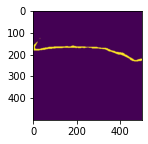

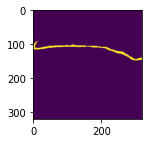

In [27]:
#plt显式照片
plt.figure(figsize=(2, 2))
plt.imshow(image3)
plt.show()
plt.figure(figsize=(2, 2))
plt.imshow(image1)
plt.show()

In [89]:
image5=cv2.imread('gutou.tif',1)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)
image5=image5[:,:,0]
image5=image5/image5.max()

In [71]:
image5.shape

(750, 450)

In [83]:
flag_image5=np.sum(image5,axis=0)
image5_zero=np.where(flag_image5 == 0)[0]
image5_zero

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449],
      dtype=int64)

In [90]:
image5=image5[0:750,33:421]

In [56]:
cv2.namedWindow("Image",0)
cv2.imshow('Image',image5)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
skeleton_img = get_img_skeleton_by_mat(image5)#图片边界不能有对象，必须是黑的

正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行MAT算法的第11轮
正在执行MAT算法的第12轮
正在执行MAT算法的第13轮
正在执行MAT算法的第14轮
正在执行MAT算法的第20轮
正在执行MAT算法的第21轮
正在执行MAT算法的第22轮
正在执行MAT算法的第23轮
正在执行MAT算法的第24轮
正在执行MAT算法的第25轮
正在执行MAT算法的第26轮
正在执行MAT算法的第27轮
正在执行MAT算法的第28轮
正在执行MAT算法的第29轮
正在执行MAT算法的第30轮
正在执行MAT算法的第31轮
正在执行MAT算法的第32轮
正在执行MAT算法的第33轮
正在执行MAT算法的第34轮
正在执行MAT算法的第35轮
正在执行MAT算法的第36轮
正在执行MAT算法的第37轮
正在执行MAT算法的第38轮
正在执行MAT算法的第39轮
正在执行MAT算法的第40轮
正在执行MAT算法的第41轮
正在执行MAT算法的第42轮
正在执行MAT算法的第43轮
正在执行MAT算法的第44轮
正在执行MAT算法的第45轮
正在执行MAT算法的第46轮
正在执行MAT算法的第47轮
正在执行MAT算法的第48轮
正在执行MAT算法的第49轮
正在执行MAT算法的第50轮
正在执行MAT算法的第51轮
正在执行MAT算法的第52轮
正在执行MAT算法的第53轮
正在执行MAT算法的第54轮
正在执行MAT算法的第55轮
正在执行MAT算法的第56轮
正在执行MAT算法的第57轮
正在执行MAT算法的第58轮


In [30]:
cv2.namedWindow("Image",0)
cv2.imshow('Image',skeleton_img)
cv2.waitKey()
cv2.destroyAllWindows()